In [54]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [55]:
from LoadMultiFiles import LoadOneFileUproot
dict_time_constant = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/daughter_contribution/fitResult.root",
                                        "fitResult", return_list=False)

dict_time_constant_total = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult.root",
                                       "fitResult", return_list=False)

dict_time_constant_total_theta15 = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15.root", "fitResult", return_list=False)
dict_time_constant_theta15 = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/daughter_contribution/fitResult_theta15_diffSource.root","fitResult", return_list=False)


# With dE Cut
dict_time_constant_total_theta15_withECut = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15_with_dECut2.root", "fitResult", return_list=False)

# dict_time_constant_withFrac = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15_WithElecFrac_modelInput.root",
#                                                 "fitResult",return_list=False)
# dict_time_constant_withFrac = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15_WithElecFrac_fixed_modelInput.root",
#                                                 "fitResult",return_list=False)
dict_time_constant_withFrac = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/particle_dependent/fitResult_theta15_WithElecFrac_penalized_modelInput_2.root",
                                                "fitResult",return_list=False)


In [56]:
df_pars_all_component = pd.DataFrame.from_dict(dict_time_constant_total)
df_pars_all_component["source"] = df_pars_all_component["source"]-1
df_pars = pd.DataFrame.from_dict(dict_time_constant)
df_pars = pd.concat((df_pars_all_component, df_pars))
df_pars["theta"] = 90

df_pars_all_component_theta15 = pd.DataFrame.from_dict(dict_time_constant_total_theta15)
df_pars_all_component_theta15["source"] = df_pars_all_component_theta15["source"]-1


df_pars_theta15 = pd.DataFrame.from_dict(dict_time_constant_theta15)
df_pars_all_component_theta15 = pd.concat((df_pars_all_component_theta15, df_pars_theta15))
df_pars_all_component_theta15["theta"]  = 15
df_pars = pd.concat((df_pars_all_component_theta15, df_pars))

df_pars["withElecFrac"] = False

df_pars_theta15_withFrac = pd.DataFrame.from_dict(dict_time_constant_withFrac)
df_pars_theta15_withFrac["source"] = df_pars_theta15_withFrac["source"]-1
# df_pars_theta15_withFrac["theta"]  = 15
df_pars_theta15_withFrac["withElecFrac"] = True
df_pars = pd.concat((df_pars_theta15_withFrac, df_pars))



In [57]:
df_pars["withECut"] = False
df_pars_all_component_theta15_withECut = pd.DataFrame.from_dict(dict_time_constant_total_theta15_withECut)
df_pars_all_component_theta15_withECut["source"] = df_pars_all_component_theta15_withECut["source"]-1
df_pars_all_component_theta15_withECut["withECut"] = True
df_pars_all_component_theta15_withECut["withElecFrac"] = False
df_pars = pd.concat((df_pars, df_pars_all_component_theta15_withECut))

df_pars



,N_nuclei,source,tau1,tau2,tau3,N1,N2,N3,tau1_error,tau2_error,tau3_error,N1_error,N2_error,N3_error,frac_e_error,frac_e,withElecFrac,theta,withECut
0,2,-1,5.685113,27.752491,183.494095,0.726429,0.232884,0.040687,0.087037,0.682668,4.010205,0.008575,0.007976,0.011711,0.038804,0.580030,True,NaN,False
1,4,-1,5.307186,24.690654,181.319784,0.755351,0.205920,0.038729,0.008757,0.085979,1.147241,0.000268,0.000285,0.000391,0.006171,0.244869,True,NaN,False
2,6,-1,5.371005,25.798688,184.407472,0.735871,0.219618,0.044512,0.031875,0.317105,1.716694,0.004404,0.003767,0.005795,0.035617,0.370183,True,NaN,False
3,10,-1,5.231713,26.127754,193.311336,0.737170,0.212551,0.050279,0.005556,0.059158,0.669241,0.000188,0.000202,0.000276,0.003553,0.117386,True,NaN,False
4,12,-1,5.217135,27.067004,195.865631,0.703219,0.233292,0.063489,0.013677,0.136970,1.379778,0.000478,0.000517,0.000704,0.005627,0.198358,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,14,-1,5.235591,27.926646,201.523664,0.720217,0.215302,0.064480,0.032967,0.503752,3.194159,0.003692,0.003333,0.004974,NaN,NaN,False,NaN,True
6,16,-1,5.218284,29.044420,203.530001,0.698866,0.228534,0.072600,0.043243,0.640813,4.029668,0.004627,0.004218,0.006261,NaN,NaN,False,NaN,True
7,18,-1,5.180550,30.509042,206.072158,0.689713,0.230215,0.080072,0.039598,0.645988,3.647037,0.004136,0.003695,0.005547,NaN,NaN,False,NaN,True
8,20,-1,5.176484,31.772043,216.509502,0.679087,0.234499,0.086414,0.035590,0.578947,3.372815,0.003568,0.003258,0.004832,NaN,NaN,False,NaN,True


In [58]:
df_pars[df_pars["theta"]==15].value_counts("source")

source
-1    10
 0    10
 1    10
dtype: int64

In [59]:
dict_N2dEdx = {}
with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/BeamEnergy.npz",allow_pickle=True) as f:
    for name_ion, dE_dx in zip(f["name"],f["dE_dx"]):
        dict_N2dEdx[int(name_ion.split("_")[1])] = dE_dx
df_pars["dE/dx"] = df_pars["N_nuclei"].replace(dict_N2dEdx)
df_pars

,N_nuclei,source,tau1,tau2,tau3,N1,N2,N3,tau1_error,tau2_error,tau3_error,N1_error,N2_error,N3_error,frac_e_error,frac_e,withElecFrac,theta,withECut,dE/dx
0,2,-1,5.685113,27.752491,183.494095,0.726429,0.232884,0.040687,0.087037,0.682668,4.010205,0.008575,0.007976,0.011711,0.038804,0.580030,True,NaN,False,0.336700
1,4,-1,5.307186,24.690654,181.319784,0.755351,0.205920,0.038729,0.008757,0.085979,1.147241,0.000268,0.000285,0.000391,0.006171,0.244869,True,NaN,False,1.262626
2,6,-1,5.371005,25.798688,184.407472,0.735871,0.219618,0.044512,0.031875,0.317105,1.716694,0.004404,0.003767,0.005795,0.035617,0.370183,True,NaN,False,2.946128
3,10,-1,5.231713,26.127754,193.311336,0.737170,0.212551,0.050279,0.005556,0.059158,0.669241,0.000188,0.000202,0.000276,0.003553,0.117386,True,NaN,False,8.164983
4,12,-1,5.217135,27.067004,195.865631,0.703219,0.233292,0.063489,0.013677,0.136970,1.379778,0.000478,0.000517,0.000704,0.005627,0.198358,True,NaN,False,11.952862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,14,-1,5.235591,27.926646,201.523664,0.720217,0.215302,0.064480,0.032967,0.503752,3.194159,0.003692,0.003333,0.004974,NaN,NaN,False,NaN,True,16.329966
6,16,-1,5.218284,29.044420,203.530001,0.698866,0.228534,0.072600,0.043243,0.640813,4.029668,0.004627,0.004218,0.006261,NaN,NaN,False,NaN,True,21.380471
7,18,-1,5.180550,30.509042,206.072158,0.689713,0.230215,0.080072,0.039598,0.645988,3.647037,0.004136,0.003695,0.005547,NaN,NaN,False,NaN,True,27.356902
8,20,-1,5.176484,31.772043,216.509502,0.679087,0.234499,0.086414,0.035590,0.578947,3.372815,0.003568,0.003258,0.004832,NaN,NaN,False,NaN,True,33.670034


In [60]:
from GlobalFunction import SortParameters
df_pars = SortParameters(df_pars)
df_pars

,N_nuclei,source,tau1,tau2,tau3,N1,N2,N3,tau1_error,tau2_error,tau3_error,N1_error,N2_error,N3_error,frac_e_error,frac_e,withElecFrac,theta,withECut,dE/dx
0,2,-1,5.685113,27.752491,183.494095,0.726429,0.232884,0.040687,0.087037,0.682668,4.010205,0.008575,0.007976,0.011711,0.038804,0.580030,True,NaN,False,0.336700
1,4,-1,5.210998,23.841546,182.753831,0.766716,0.196554,0.036730,0.010383,0.141953,1.217056,0.001329,0.001230,0.001811,0.006171,0.244869,True,NaN,False,1.262626
2,6,-1,5.066648,23.298343,181.173158,0.765614,0.197570,0.036816,0.021493,0.292902,1.429111,0.003404,0.003176,0.004655,0.035617,0.370183,True,NaN,False,2.946128
3,10,-1,5.231713,26.127754,193.311336,0.737170,0.212551,0.050279,0.005556,0.059158,0.669241,0.000188,0.000202,0.000276,0.003553,0.117386,True,NaN,False,8.164983
4,12,-1,5.217135,27.067004,195.865631,0.703219,0.233292,0.063489,0.013677,0.136970,1.379778,0.000478,0.000517,0.000704,0.005627,0.198358,True,NaN,False,11.952862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,14,-1,5.235591,27.926646,201.523664,0.720217,0.215302,0.064480,0.032967,0.503752,3.194159,0.003692,0.003333,0.004974,NaN,NaN,False,NaN,True,16.329966
6,16,-1,5.218284,29.044420,203.530001,0.698866,0.228534,0.072600,0.043243,0.640813,4.029668,0.004627,0.004218,0.006261,NaN,NaN,False,NaN,True,21.380471
7,18,-1,5.180550,30.509042,206.072158,0.689713,0.230215,0.080072,0.039598,0.645988,3.647037,0.004136,0.003695,0.005547,NaN,NaN,False,NaN,True,27.356902
8,20,-1,5.176484,31.772043,216.509502,0.679087,0.234499,0.086414,0.035590,0.578947,3.372815,0.003568,0.003258,0.004832,NaN,NaN,False,NaN,True,33.670034


In [61]:
v_name_timing_constant = ["N1", "tau1", "N2", "tau2", "N3", "tau3"]
dir_v_timing_constant = {}

dir_mean_dE_dx_with_quench = {'alpha': 122.773224, 'Co60': 0.6747912, 'AmC': 29.574236}
dir_v_timing_constant[dir_mean_dE_dx_with_quench["Co60"]] = [79.9,4.93,17.1,20.6,3,190]
dir_v_timing_constant[dir_mean_dE_dx_with_quench["AmC"]] = [65,4.93,23.1,34,11.9,220]
dir_v_timing_constant[dir_mean_dE_dx_with_quench["alpha"]] = [65,4.93,22.8,35,12.2,220]

for particle in dir_v_timing_constant.keys():
    for i in range(len(v_name_timing_constant)):
        if "N" in v_name_timing_constant[i]:
            dir_v_timing_constant[particle][i] = dir_v_timing_constant[particle][i]*0.01
df_model = pd.DataFrame.from_dict(dir_v_timing_constant, orient="index", columns=v_name_timing_constant)
df_model

,N1,tau1,N2,tau2,N3,tau3
0.674791,0.799,4.93,0.171,20.6,0.030,190
29.574236,0.650,4.93,0.231,34.0,0.119,220
122.773224,0.650,4.93,0.228,35.0,0.122,220


In [62]:
dict_replace_sourceTag = {"total":-1,"main track":0, "electron":1, "others":2, "optical photon":3}
dict_replace_Num2Tag = {Num:Tag for Tag, Num in dict_replace_sourceTag.items()}
dict_replace_Num2Tag

{-1: 'total', 0: 'main track', 1: 'electron', 2: 'others', 3: 'optical photon'}

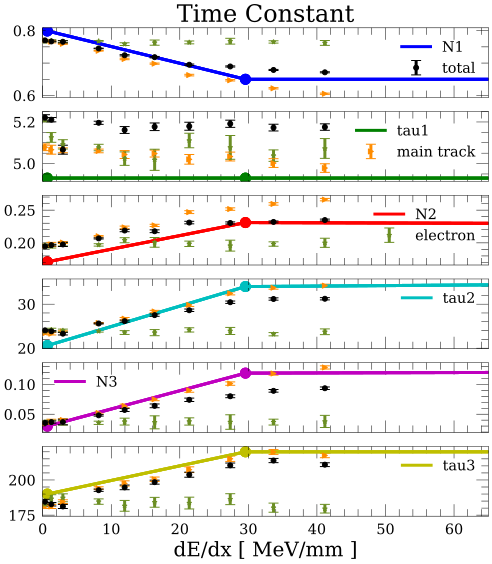

In [63]:
# Normalization of parameters N*
n_figures = len(df_model.columns)
colors = ["b","g","r","c","m","y","k","w"]
dict_marker = {-1:"o", 0:">", 1:"*"}
dict_marker_color = {-1:"black", 0:"darkorange", 1:"olivedrab"}
dir_v_x = {}
dir_v_y = {}
fig,axs = plt.subplots(n_figures,1,sharex="col",figsize=(8,9))
for j, source in enumerate( set(df_pars["source"]) ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        v_x = np.array(df_model.index)
        v_y = np.array(df_model[name_time_constant] )

        axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=name_time_constant if j==0 else "")
        axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    #
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 color=dict_marker_color[source], ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor=dict_marker_color[source],
                                 markersize=5, label=dict_replace_Num2Tag[source] if i_constant==source+1 else "")
        axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")

In [64]:
with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/OneShotSimulation/dE_xErr.root.npz", allow_pickle=True) as f:
    dict_dE_range = f["dE_quench"].item()

In [65]:
dict_xerr = {}
for key, tuple_dE in dict_dE_range.items():
    dict_xerr[int(key.split("_")[1])] = np.abs(tuple_dE[0]-np.mean(tuple_dE))
print(list(dict_xerr.values()))

[0.07498178727218519, 0.232148985763577, 0.36801534746702824, 0.6276537533040596, 0.7511182156004956, 0.87470221108223, 1.005184806563154, 1.1180148798602296, 1.25115240888546, 1.3512455861806316]


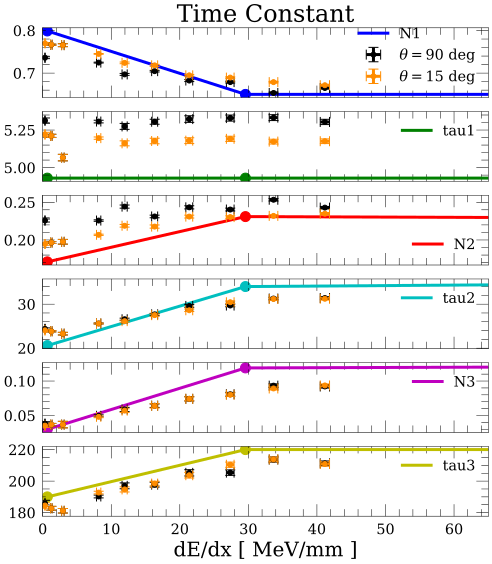

In [66]:
fig,axs = plt.subplots(n_figures,1,sharex="col",figsize=(8,9))
for j, source in enumerate([-1] ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==90)]
    df_pars_subset_source_theta15 = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        v_x = np.array(df_model.index)
        v_y = np.array(df_model[name_time_constant] )

        axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=name_time_constant if j==0 else "")
        axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    #
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2 ,
                                 color=dict_marker_color[source], ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor=dict_marker_color[source],
                                 markersize=5, label=r"$\theta=90$ deg" if i_constant==source+1 else "")

        axs[i_constant].errorbar(df_pars_subset_source_theta15["dE/dx"], df_pars_subset_source_theta15[name_time_constant],
                                 yerr=df_pars_subset_source_theta15[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2,
                                 color="darkorange", ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor="darkorange",
                                 markersize=5, label=r"$\theta=15$ deg"  if i_constant==source+1 else "")

        axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")

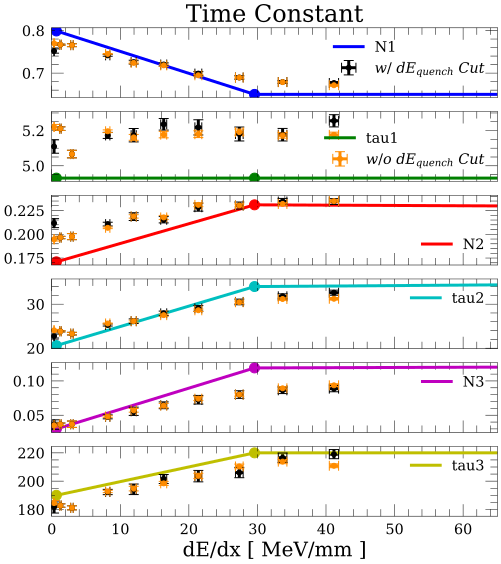

In [67]:
fig,axs = plt.subplots(n_figures,1,sharex="col",figsize=(8,9))
for j, source in enumerate([-1] ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["withECut"]==True)]
    df_pars_subset_source_theta15 = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15) & (df_pars["withECut"]==False)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        v_x = np.array(df_model.index)
        v_y = np.array(df_model[name_time_constant] )

        axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=name_time_constant if j==0 else "")
        axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    #
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2 ,
                                 color=dict_marker_color[source], ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor=dict_marker_color[source],
                                 markersize=5, label="$w/\ dE_{quench}\ Cut$" if i_constant==source+1 else "")

        axs[i_constant].errorbar(df_pars_subset_source_theta15["dE/dx"], df_pars_subset_source_theta15[name_time_constant],
                                 yerr=df_pars_subset_source_theta15[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2,
                                 color="darkorange", ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor="darkorange",
                                 markersize=5, label=r"$w/o\ dE_{quench}\ Cut$"  if i_constant==source+2 else "")

        axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")

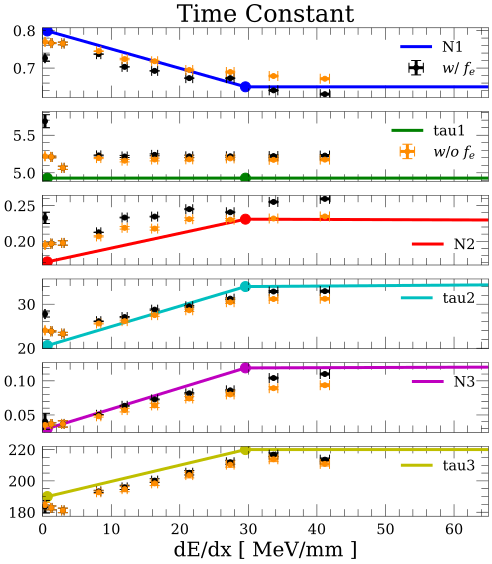

In [68]:
fig,axs = plt.subplots(n_figures,1,sharex="col",figsize=(8,9))
# dict_ylim = {"tau1":(4.9, 6.5), "N1":(0.5, 0.82), "tau2":(19, 35), "N2":(0.15, 0.3), "tau3":(175, 232), "N3":(0,0.2)}
dict_ylim = {}
for j, source in enumerate([-1] ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["withElecFrac"]==True)]
    df_pars_subset_source_theta15 = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        v_x = np.array(df_model.index)
        v_y = np.array(df_model[name_time_constant] )

        axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=name_time_constant if j==0 else "")
        axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    #
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2 ,
                                 color=dict_marker_color[source], ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor=dict_marker_color[source],
                                 markersize=5, label="$w/\ f_e$" if i_constant==source+1 else "")

        axs[i_constant].errorbar(df_pars_subset_source_theta15["dE/dx"], df_pars_subset_source_theta15[name_time_constant],
                                 yerr=df_pars_subset_source_theta15[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2,
                                 color="darkorange", ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor="darkorange",
                                 markersize=5, label="$w/o\ f_e$"  if i_constant==source+2 else "")

        axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
        if dict_ylim:
            axs[i_constant].set_ylim(*dict_ylim[name_time_constant])
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")

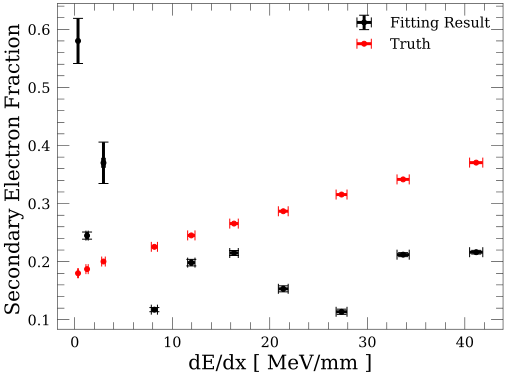

In [72]:
df_pars_subset_source = df_pars[ (df_pars["withElecFrac"]==True)]
v_ElecFrac_Truth = [0.1800908150772047,0.18716819964028358,0.20026041586599805,0.2255320147145066,
                                      0.24520809993064605,0.2655703456813066,0.28680876518467013,0.3155647241297086,
                                      0.34163689415752624,0.3705200202457727]
plt.errorbar( df_pars_subset_source["dE/dx"], df_pars_subset_source["frac_e"],
              yerr=df_pars_subset_source["frac_e_error"],
              xerr=np.array( list(dict_xerr.values()) )/2,
                color="black", ls='none', capsize=5, capthick=1,
                ecolor="black",markersize=5, fmt="o", label="Fitting Result")
plt.errorbar( df_pars_subset_source["dE/dx"], v_ElecFrac_Truth,
              xerr=np.array( list(dict_xerr.values()) )/2,
                color="red", ls='none', capsize=5, capthick=1,
                ecolor="red",markersize=5, fmt="o", label="Truth")
plt.ylabel("Secondary Electron Fraction ")
plt.xlabel("dE/dx [ MeV/mm ]")
plt.legend()
# plt.title("Fit Result")

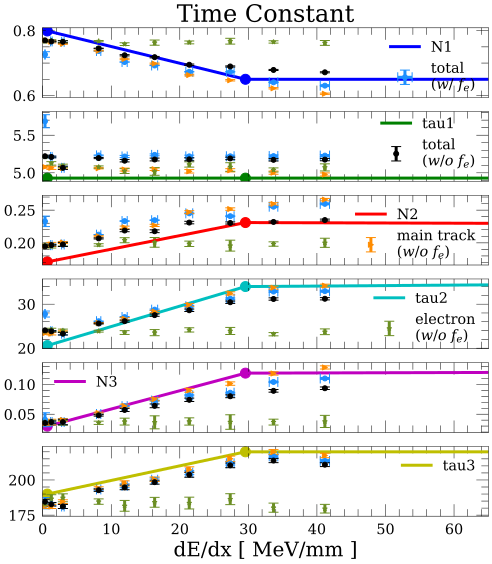

In [70]:
fig,axs = plt.subplots(n_figures,1,sharex="col",figsize=(8,9))
# dict_ylim = {"tau1":(4.9, 6.5), "N1":(0.5, 0.82), "tau2":(19, 35), "N2":(0.15, 0.3), "tau3":(175, 232), "N3":(0,0.2)}
dict_ylim = {}
for j, source in enumerate([-1] ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["withElecFrac"]==True)]
    df_pars_subset_source_theta15 = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        v_x = np.array(df_model.index)
        v_y = np.array(df_model[name_time_constant] )

        axs[i_constant].plot(v_x, v_y, color=colors[i_constant], label=name_time_constant if j==0 else "")
        axs[i_constant].scatter(v_x,v_y, color=colors[i_constant])
    #
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 xerr=np.array( list(dict_xerr.values()) )/2 ,
                                 color="dodgerblue", ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor="dodgerblue",
                                 markersize=5, label="total\n$(w/\ f_e)$" if i_constant==source+1 else "")

        # axs[i_constant].errorbar(df_pars_subset_source_theta15["dE/dx"], df_pars_subset_source_theta15[name_time_constant],
        #                          yerr=df_pars_subset_source_theta15[name_time_constant+"_error"],
        #                          xerr=np.array( list(dict_xerr.values()) )/2,
        #                          color="darkorange", ls='none', marker=dict_marker[source], capsize=5, capthick=1,
        #                          ecolor="darkorange",
        #                          markersize=5, label="$w/o\ f_e$"  if i_constant==source+2 else "")

        # axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
        if dict_ylim:
            axs[i_constant].set_ylim(*dict_ylim[name_time_constant])
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")

suffix_label = "\n$(w/o\ f_e)$"
for j, source in enumerate( set(df_pars["source"]) ):
    df_pars_subset_source = df_pars[(df_pars["source"]==source) & (df_pars["theta"]==15)]
    for i_constant, name_time_constant in enumerate(v_name_timing_constant):
        axs[i_constant].errorbar(df_pars_subset_source["dE/dx"], df_pars_subset_source[name_time_constant],
                                 yerr=df_pars_subset_source[name_time_constant+"_error"],
                                 color=dict_marker_color[source], ls='none', marker=dict_marker[source], capsize=5, capthick=1,
                                 ecolor=dict_marker_color[source],
                                 markersize=5, label=dict_replace_Num2Tag[source]+suffix_label if i_constant==source+2 else "")
        axs[i_constant].set_xlim(0,65)
        axs[i_constant].legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    axs[0].set_title("Time Constant")